In [42]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
import matplotlib.font_manager as fm

font_name= fm.FontProperties(fname ='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family= font_name)

In [20]:
suwoonmap=gpd.read_file("C:/Users/19178/Desktop/suwoon/32.수원시_지적도.geojson")
suwoon=gpd.read_file("C:/Users/19178/Desktop/suwoon/31.수원시_행정경계(읍면동).geojson")
suwoon_copy=suwoon.copy()
suwoon.head(5)


In [ ]:
수원행정구역현황=suwoon_copy.ADM_DR_NM.value_counts()
수원행정구역현황.shape # 총 44개

# 1. 객체 속성
* area : 면적 계산
* length : 길이 계산
* boundary : 테두리(LineString객체)
* exterior : 테두리(LinearRing객체)
* centroid : 무게중심점
* xy : 좌표 반환(array, tuple 객체)
* coords : 좌표 반환(shapely.coords객체)
* is_valid : 도형 유효성 검사(boolean)
* geom_type : 공간 객체 타입

In [31]:
suwoonmap.columns

Index(['PNU', 'JIBUN', 'geometry'], dtype='object')

In [26]:
# area 확인
suwoonmap.geometry.area.head()

C:\Users\19178\.conda\envs\gpd\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    5.969478e-08
1    5.465551e-09
2    2.405034e-08
3    1.010920e-06
4    5.610331e-08
dtype: float64

In [27]:
#length 확인: 폴리곤의 경우 테두리, 이 정보는 점이라서 몹시 짧음
suwoonmap.geometry.length.head()

C:\Users\19178\.conda\envs\gpd\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    0.001062
1    0.000459
2    0.000685
3    0.004004
4    0.001230
dtype: float64

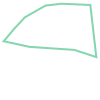

In [30]:
#boundary확인
suwoonmap.geometry[0].boundary

In [34]:
# is_valid 유효성 확인
suwoonmap.geometry.is_valid.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

# 2. 공간 관계
* within : 포함되는지 여부
* contain : 포함하고 있는지 여부
* intersects : 교차하는지 여부(경계에 닿아 있기만 해도됨)
* crosses : 교차하는지 여부(내부를 지나가야 함)
* distance : 두 공간 사이의 직선(최단)거리를 계산한다.

In [38]:
suwoonmap.head(5)

,PNU,JIBUN,geometry
0,4111710300101670003,167-3전,"MULTIPOLYGON (((127.05529 37.28866, 127.05533 ..."
1,4111113800101980001,198-1전,"MULTIPOLYGON (((127.01543 37.32614, 127.01547 ..."
2,4111710300201190028,산119-28임,"MULTIPOLYGON (((127.05120 37.28951, 127.05120 ..."
3,4111710300109070001,907-1잡,"MULTIPOLYGON (((127.03676 37.29320, 127.03723 ..."
4,4111710300101770017,177-17임,"MULTIPOLYGON (((127.05132 37.28945, 127.05170 ..."


<AxesSubplot:>

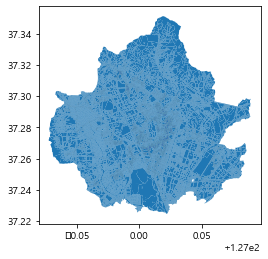

In [43]:
#plot 그려보기 fiona 라이브러리 설치
import fiona

suwoonmap.plot()

In [49]:
#좌표정보 확인: EPSG:4326
print(suwoonmap.crs )
type(suwoonmap.crs)

+init=epsg:5179 +type=crs


pyproj.crs.crs.CRS

In [46]:
suwoonmap.crs = {'init':'epsg:4326'}

In [47]:
# EPSG 4326 => EPSG 5179
suwoonmap=suwoonmap.to_crs({'init':'epsg:5179'})

In [56]:
suwoonmap.crs

<Projected CRS: +init=epsg:5179 +type=crs>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Korea, Republic of (South Korea)
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [57]:
suwoonmap['JIBUN']

0           167-3전
1           198-1전
2         산119-28임
3           907-1잡
4          177-17임
            ...   
128836    170-43 전
128837    170-34 전
128838    1114-6 대
128839     286-1 답
128840      146-1대
Name: JIBUN, Length: 128841, dtype: object

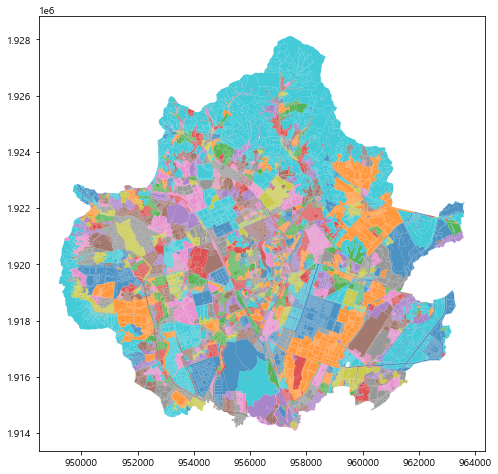

In [58]:
back=suwoonmap.plot(column='JIBUN',figsize=(8,8),alpha=0.8)

In [99]:
factory=pd.read_csv("C:/Users/19178/Desktop/suwoon/공장등록현황.csv",encoding='cp949')

In [100]:
factory.columns

Index(['회사명', '행정기관명', '단지명', '설립구분명', '용지면적', '건축면적', '종업원수', '공장규모구분명',
       '공장등록일', '용도지역명', '지목명', '업종명', '업종코드', '생산품정보', '대기오염등급', '수질오염등급',
       '소음진동여부', '생활용수사용량(톤/일)', '산업용수사용량(톤/일)', '자기자본액(백만)', '타인자본액(백만)',
       '전화번호', '홈페이지주소', '소재지우편번호', '소재지도로명주소', '소재지지번주소', 'WGS84위도',
       'WGS84경도'],
      dtype='object')

In [103]:
factory.dtypes

회사명              object
행정기관명            object
단지명              object
설립구분명            object
용지면적            float64
건축면적            float64
종업원수            float64
공장규모구분명          object
공장등록일            object
용도지역명            object
지목명              object
업종명              object
업종코드             object
생산품정보            object
대기오염등급           object
수질오염등급           object
소음진동여부           object
생활용수사용량(톤/일)    float64
산업용수사용량(톤/일)    float64
자기자본액(백만)       float64
타인자본액(백만)       float64
전화번호             object
홈페이지주소           object
소재지우편번호         float64
소재지도로명주소         object
소재지지번주소          object
WGS84위도         float64
WGS84경도         float64
dtype: object

In [104]:
factory1=factory.loc[:,['용지면적','건축면적','공장규모구분명','대기오염등급','WGS84위도','WGS84경도','소재지도로명주소']]
factory1.head(10)

,용지면적,건축면적,공장규모구분명,대기오염등급,WGS84위도,WGS84경도,소재지도로명주소
0,16135.6,12840.10,중기업,해당없음,37.730311,126.712244,"경기도 파주시 산업단지길 122 (다율동,JEI재능인쇄)"
1,0.0,1150.00,소기업,해당없음,37.729844,126.709183,경기도 파주시 산업단지길 163 (문발동)
2,0.0,668.16,소기업,해당없음,37.731151,126.713103,경기도 파주시 산업단지길 118-54 정보문화사 (신촌동)
3,3744.3,2062.41,소기업,해당없음,37.731151,126.713103,경기도 파주시 산업단지길 118-54 정보문화사 (신촌동)
4,0.0,403.70,소기업,해당없음,37.730311,126.712244,"경기도 파주시 산업단지길 122 (다율동,JEI재능인쇄)"
5,4590.1,7568.83,소기업,해당없음,37.730095,126.708774,경기도 파주시 산업단지길 179 (문발동)
6,0.0,2747.13,소기업,해당없음,37.730095,126.708774,경기도 파주시 산업단지길 179 (문발동)
7,10439.0,14280.14,중기업,해당없음,37.729397,126.710660,"경기도 파주시 산업단지길 139 (문발동,(주)G.M.P)"
8,0.0,100.00,소기업,해당없음,37.730095,126.708774,경기도 파주시 산업단지길 179 갑우문화사 (문발동)
9,97257.7,77901.31,대기업,5종,37.727617,126.711960,"경기도 파주시 산업단지길 76 (문발동,ASE.KOREA)"


In [105]:
factory1['대기오염등급'].unique()

array(['해당없음', '5종', '4종', '2종', '1종', '3종', nan], dtype=object)

In [106]:
airfactory=factory1.loc[(factory1['대기오염등급']!='해당없음')*(factory1['대기오염등급'].notnull()),:]

In [107]:
airfactory.head(10)

,용지면적,건축면적,공장규모구분명,대기오염등급,WGS84위도,WGS84경도,소재지도로명주소
9,97257.7,77901.31,대기업,5종,37.727617,126.711960,"경기도 파주시 산업단지길 76 (문발동,ASE.KOREA)"
19,9284.5,8373.94,중기업,5종,37.728204,126.709303,"경기도 파주시 산업단지길 34 (문발동,(주)G.M.P필름프렌트)"
25,0.0,2427.37,소기업,4종,37.729397,126.710660,"경기도 파주시 산업단지길 139 (문발동,(주)G.M.P)"
27,3350.0,1485.18,소기업,5종,37.728343,126.710573,"경기도 파주시 산업단지길 55 (문발동,GMP코팅프렌트)"
38,12750.0,2646.59,소기업,5종,37.791294,127.472806,경기도 가평군 가평읍 상천고갯길 236-13 (주)새한레미콘 (상색리)
48,8017.0,4304.94,소기업,5종,37.819820,127.356233,경기도 가평군 조종면 대보간선로 29 (주)우리술 (대보리)
61,14700.0,2623.60,소기업,5종,37.799181,127.480917,경기도 가평군 가평읍 경춘로 1789 (총 6 필지) (상색리)
71,1129.0,825.00,소기업,4종,37.766042,127.446952,경기도 가평군 청평면 행자골길 7 대한금속(주) (상천리)
74,1875.0,374.16,소기업,5종,37.729939,127.399456,경기도 가평군 청평면 소돌말길 117 (대성리)
77,9822.0,3945.39,중기업,4종,37.800459,127.487886,경기도 가평군 가평읍 연갈길 124-10 (주)청우식품 (상색리)


In [108]:
air_fact=gpd.points_from_xy(airfactory.WGS84경도,airfactory.WGS84위도)
air_fact[0:3]

<GeometryArray>
Length: 3, dtype: geometry

In [114]:
#crs 속성 변경 라이브러리

import pyproj
from fiona.crs import from_epsg
cols=['용지면적', '건축면적', '공장규모구분명', '대기오염등급','소재지도로명주소']
gdf_fact=gpd.GeoDataFrame(airfactory[cols], geometry=air_fact,
                         crs=from_epsg(4326))


gdf_fact2=gdf_fact.to_crs(epsg=3857)
gdf_fact.head(5)

,용지면적,건축면적,공장규모구분명,대기오염등급,소재지도로명주소,geometry
9,97257.7,77901.31,대기업,5종,"경기도 파주시 산업단지길 76 (문발동,ASE.KOREA)",POINT (126.71196 37.72762)
19,9284.5,8373.94,중기업,5종,"경기도 파주시 산업단지길 34 (문발동,(주)G.M.P필름프렌트)",POINT (126.70930 37.72820)
25,0.0,2427.37,소기업,4종,"경기도 파주시 산업단지길 139 (문발동,(주)G.M.P)",POINT (126.71066 37.72940)
27,3350.0,1485.18,소기업,5종,"경기도 파주시 산업단지길 55 (문발동,GMP코팅프렌트)",POINT (126.71057 37.72834)
38,12750.0,2646.59,소기업,5종,경기도 가평군 가평읍 상천고갯길 236-13 (주)새한레미콘 (상색리),POINT (127.47281 37.79129)


In [112]:
gdf_fact2.head(5)

,용지면적,건축면적,공장규모구분명,대기오염등급,소재지도로명주소,geometry
9,97257.7,77901.31,대기업,5종,"경기도 파주시 산업단지길 76 (문발동,ASE.KOREA)",POINT (14105510.876 4541018.298)
19,9284.5,8373.94,중기업,5종,"경기도 파주시 산업단지길 34 (문발동,(주)G.M.P필름프렌트)",POINT (14105215.133 4541101.057)
25,0.0,2427.37,소기업,4종,"경기도 파주시 산업단지길 139 (문발동,(주)G.M.P)",POINT (14105366.138 4541268.912)
27,3350.0,1485.18,소기업,5종,"경기도 파주시 산업단지길 55 (문발동,GMP코팅프렌트)",POINT (14105356.498 4541120.522)
38,12750.0,2646.59,소기업,5종,경기도 가평군 가평읍 상천고갯길 236-13 (주)새한레미콘 (상색리),POINT (14190207.843 4549984.506)


In [115]:
gdf_fact2.to_file('대기오염공장.geojson', driver='GeoJSON')

In [ ]:
공장현황2=gpd.GeoDataFrame(공장현황1, geometry)